In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -t chesterish

In [1]:
import tensorflow as tf

2023-01-15 13:06:25.954887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Importing libraries

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#importing class to do preprocessing on the data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np

Unzipping the world population file

In [3]:
from zipfile import ZipFile
zf = ZipFile('archive.zip', 'r')
zf.extractall()

In [4]:
df=pd.read_csv('world_population.csv')

In [5]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


Describing general features of the dataframe

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Import Seaborn for graphs

In [8]:
import seaborn as sns

Outputs entries as booleans

In [7]:
df["2022 Population"]>10000000

0       True
1      False
2       True
3      False
4      False
       ...  
229    False
230    False
231     True
232     True
233     True
Name: 2022 Population, Length: 234, dtype: bool

Outputs elements for which the boolean is true

In [14]:
df[df["2022 Population"]>10000000]

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
11,55,AUS,Australia,Canberra,Oceania,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034,7692024,3.4032,1.0099,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,51,VEN,Venezuela,Caracas,South America,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.8820,1.0036,0.35
228,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


Shows the value of the second given column but only for those entries for which the condition is true

In [13]:
df[df["2022 Population"]>10000000]['Growth Rate']

0      1.0257
2      1.0164
5      1.0315
8      1.0052
11     1.0099
        ...  
227    1.0036
228    1.0074
231    1.0217
232    1.0280
233    1.0204
Name: Growth Rate, Length: 93, dtype: float64

In [16]:
df[df['Country/Territory']=='Italy']['Growth Rate']

99    0.9966
Name: Growth Rate, dtype: float64

Creating a smaller dataframe which only contains countries with population above a threshold.

In [267]:
dfCrowded=df[df['2022 Population']>200000000];
dfCrowded

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24


Scatter plot of the population of the most crowded country with their growth rate in the colour scale.

<AxesSubplot: xlabel='2010 Population', ylabel='Country/Territory'>

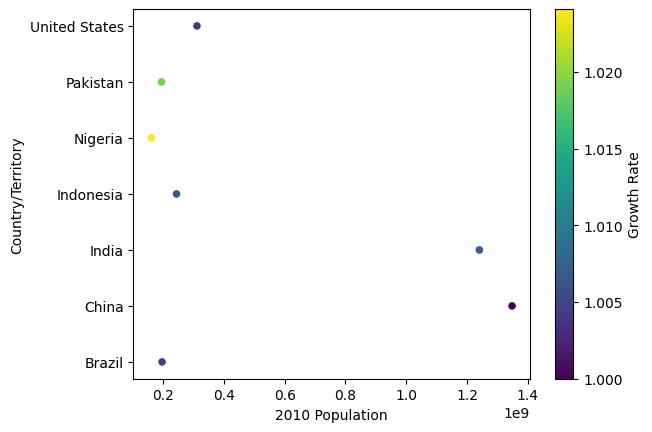

In [137]:
dfCrowded.plot.scatter(x='2010 Population',y='Country/Territory', c='Growth Rate' )

Observe the change in population of a single country. In order to plot it we isolate the row of interest and we turn it into a column.

In [260]:
#select the only the India row and only the population columns
population_of_India=(df[df['Country/Territory']=='India']).iloc[:,5:13]
#turn row into column
population_of_India=population_of_India.T
#reverse order of column
population_of_India=population_of_India[::-1]

In [262]:
#add a column which has years as variables
population_of_India['Year']=[1970,1980,1990,2000,2010,2015,2020,2022]
population_of_India

,92,Year
1970 Population,557501301,1970
1980 Population,696828385,1980
1990 Population,870452165,1990
2000 Population,1059633675,2000
2010 Population,1240613620,2010
2015 Population,1322866505,2015
2020 Population,1396387127,2020
2022 Population,1417173173,2022


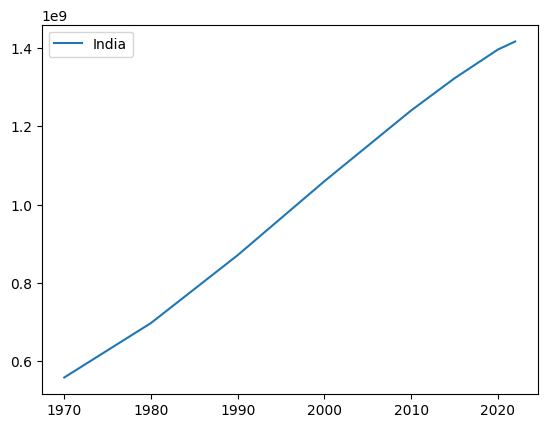

In [264]:
#population_of_India.plot()
plt.plot(np.array(population_of_India['Year']),np.array(population_of_India[92]))
plt.legend(df[df['Country/Territory']=='India']['Country/Territory'])

In [276]:
#select the only the India row and only the population columns
population_of_Italy=(df[df['Country/Territory']=='Italy']).iloc[:,5:13]
#turn row into column
population_of_Italy=population_of_Italy.T
#reverse order of column
population_of_Italy=population_of_Italy[::-1]

In [279]:
#add a column which has years as variables
population_of_Italy['Year']=[1970,1980,1990,2000,2010,2015,2020,2022]
population_of_Italy

,99,Year
1970 Population,53324036,1970
1980 Population,56329482,1980
1990 Population,56756561,1990
2000 Population,56966397,2000
2010 Population,59822450,2010
2015 Population,60232906,2015
2020 Population,59500579,2020
2022 Population,59037474,2022


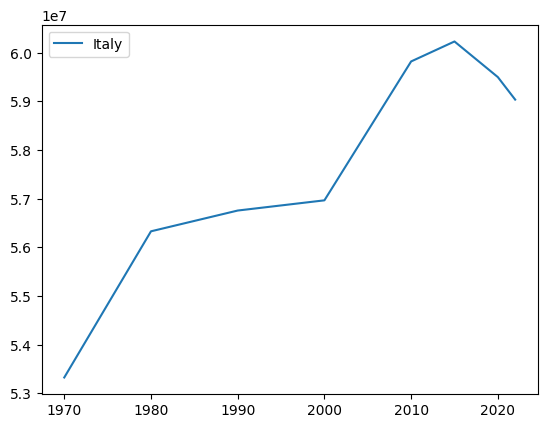

In [280]:
#population_of_India.plot()
plt.plot(np.array(population_of_Italy['Year']),np.array(population_of_Italy[99]))
plt.legend(df[df['Country/Territory']=='Italy']['Country/Territory'])

We do the same for all the most populous countries.

In [158]:
dfCrowded['Country/Territory']

27            Brazil
41             China
92             India
93         Indonesia
149          Nigeria
156         Pakistan
221    United States
Name: Country/Territory, dtype: object

In [270]:
df_crowded_smaller=dfCrowded[dfCrowded.iloc[:,5:13].columns[::-1]].T
df_crowded_smaller['Year']=[1970,1980,1990,2000,2010,2015,2020,2022]

In [271]:
df_crowded_smaller

,27,41,92,93,149,156,221,Year
1970 Population,96369875,822534450,557501301,115228394,55569264,59290872,200328340,1970
1980 Population,122288383,982372466,696828385,148177096,72951439,80624057,223140018,1980
1990 Population,150706446,1153704252,870452165,182159874,95214257,115414069,248083732,1990
2000 Population,175873720,1264099069,1059633675,214072421,122851984,154369924,282398554,2000
2010 Population,196353492,1348191368,1240613620,244016173,160952853,194454498,311182845,2010
2015 Population,205188205,1393715448,1322866505,259091970,183995785,210969298,324607776,2015
2020 Population,213196304,1424929781,1396387127,271857970,208327405,227196741,335942003,2020
2022 Population,215313498,1425887337,1417173173,275501339,218541212,235824862,338289857,2022


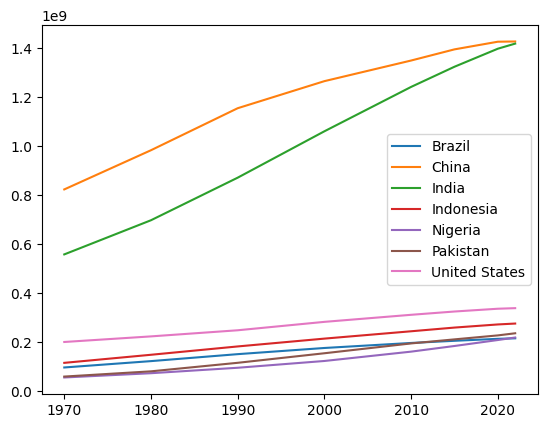

In [317]:
categ=[27,41,92,93,149,156,221]
for i in categ:
    plt.plot(np.array(df_crowded_smaller['Year']),
    np.array(df_crowded_smaller[i]))
    
#df_crowded_smaller.plot()
plt.legend(dfCrowded['Country/Territory'])

In [151]:
dfCrowded

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24


In [153]:
dfCrowded.iloc[4,5:13]

2022 Population    218541212
2020 Population    208327405
2015 Population    183995785
2010 Population    160952853
2000 Population    122851984
1990 Population     95214257
1980 Population     72951439
1970 Population     55569264
Name: 149, dtype: object

In [129]:
(dfCrowded.iloc[:,6:13].T)

,16,27,41,55,57,63,68,74,92,93,...,149,156,163,171,205,206,213,220,221,228
2020 Population,167420951,213196304,1424929781,92853164,107465134,117190911,64480053,83328988,1396387127,271857970,...,208327405,227196741,112190977,145617329,61704518,71475664,84135428,67059474,335942003,96648685
2015 Population,157830000,205188205,1393715448,78656904,97723799,102471895,63809769,82073226,1322866505,259091970,...,183995785,210969298,103031365,144668389,52542823,70294397,79646178,65224364,324607776,92191398
2010 Population,148391139,196353492,1348191368,66391257,87252413,89237791,62444567,81325090,1240613620,244016173,...,160952853,194454498,94636700,143242599,45110527,68270489,73195345,62760039,311182845,87411012
2000 Population,129193327,175873720,1264099069,48616317,71371371,67031867,58665453,81551677,1059633675,214072421,...,122851984,154369924,77958223,146844839,34463704,63066603,64113547,58850043,282398554,79001142
1990 Population,107147651,150706446,1153704252,35987541,57214630,47878073,56412897,79370196,870452165,182159874,...,95214257,115414069,61558898,148005704,26206012,55228410,54324142,57210442,248083732,66912613
1980 Population,83929765,122288383,982372466,26708686,43748556,34945469,53713830,77786703,696828385,148177096,...,72951439,80624057,48419546,138257420,19297659,45737753,44089069,56326328,223140018,52968270
1970 Population,67541860,96369875,822534450,20151733,34781986,28308246,50523586,78294583,557501301,115228394,...,55569264,59290872,37435586,130093010,13618192,35791728,35540990,55650166,200328340,41928849


In [71]:
df.iloc[:, 6:13]

,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,46189,51368,54849,58230,47818,32886,27075
4,77700,71746,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...
229,11655,12182,13142,14723,13454,11315,9377
230,556048,491824,413296,270375,178529,116775,76371
231,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,18927715,16248230,13792086,9891136,7686401,5720438,4281671


Transform Growth Rate into a binary variable

In [20]:
def isGrowing(number):
    if number>=1:
        return 1
    else:
        return 0

In [21]:
dfCrowded['Growth Rate']

16     1.0108
27     1.0046
41     1.0000
55     1.0325
57     1.0158
63     1.0257
68     1.0015
74     0.9995
92     1.0068
93     1.0064
94     1.0071
102    0.9947
131    1.0063
149    1.0241
156    1.0191
163    1.0147
171    0.9973
205    1.0300
206    1.0013
213    1.0067
220    1.0034
221    1.0038
228    1.0074
Name: Growth Rate, dtype: float64

In [31]:
growingDfCrowded=dfCrowded['Growth Rate'].map(isGrowing)
growingDfCrowded

16     1
27     1
41     1
55     1
57     1
63     1
68     1
74     0
92     1
93     1
94     1
102    0
131    1
149    1
156    1
163    1
171    0
205    1
206    1
213    1
220    1
221    1
228    1
Name: Growth Rate, dtype: int64

Substituting the values for growth rate with binary values, the warning is a false positive and can be ignored.

16     1
27     1
41     1
55     1
57     1
63     1
68     1
74     0
92     1
93     1
94     1
102    0
131    1
149    1
156    1
163    1
171    0
205    1
206    1
213    1
220    1
221    1
228    1
Name: Growth Rate, dtype: int64

In [46]:
dfCrowded['Growth Rate']=growingDfCrowded.astype('Int64')

/tmp/ipykernel_46588/1390476438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCrowded['Growth Rate']=growingDfCrowded.astype('Int64')


In [47]:
dfCrowded['Growth Rate']

16                1
27                1
41                1
55                1
57                1
63                1
68                1
74                0
92                1
93                1
94                1
102               0
131               1
149               1
156               1
163               1
171               0
205               1
206               1
213               1
220               1
221               1
228               1
Growth Rate    <NA>
Name: Growth Rate, dtype: Int64

<AxesSubplot: xlabel='2022 Population', ylabel='2020 Population'>

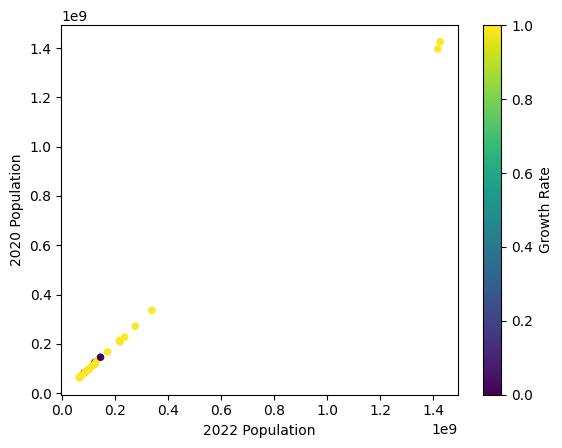

In [55]:
 dfCrowded.plot.scatter(x='2022 Population',y='2020 Population', c='Growth Rate')
                        #,c='Growth Rate',colormap='viridis')

In [32]:
dfCrowded.loc['Growth Rate']=growingDfCrowded.astype('int')

/tmp/ipykernel_46588/618042123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCrowded.loc['Growth Rate']=growingDfCrowded.astype('int')


In [53]:
dfCrowded

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
16,8.0,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1,2.15
27,7.0,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1,2.70
41,1.0,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1,17.88
55,15.0,COD,DR Congo,Kinshasa,Africa,9.901021e+07,9.285316e+07,7.865690e+07,6.639126e+07,4.861632e+07,3.598754e+07,26708686.0,20151733.0,2344858.0,42.2244,1,1.24
57,14.0,EGY,Egypt,Cairo,Africa,1.109901e+08,1.074651e+08,9.772380e+07,8.725241e+07,7.137137e+07,5.721463e+07,43748556.0,34781986.0,1002450.0,110.7188,1,1.39
63,12.0,ETH,Ethiopia,Addis Ababa,Africa,1.233799e+08,1.171909e+08,1.024719e+08,8.923779e+07,6.703187e+07,4.787807e+07,34945469.0,28308246.0,1104300.0,111.7268,1,1.55
68,23.0,FRA,France,Paris,Europe,6.462663e+07,6.448005e+07,6.380977e+07,6.244457e+07,5.866545e+07,5.641290e+07,53713830.0,50523586.0,551695.0,117.1419,1,0.81
74,19.0,DEU,Germany,Berlin,Europe,8.336984e+07,8.332899e+07,8.207323e+07,8.132509e+07,8.155168e+07,7.937020e+07,77786703.0,78294583.0,357114.0,233.4544,0,1.05
92,2.0,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,8.704522e+08,696828385.0,557501301.0,3287590.0,431.0675,1,17.77
93,4.0,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1,3.45


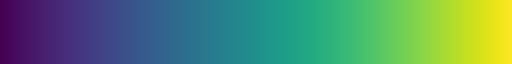

In [36]:
matplotlib.colormaps['viridis']

# Predictive Models

We try and predict the population of the various countries.

We start with India. We need to add the years as the independent variables in the dataframe.

In [172]:
population_of_India['Year']=[1970,1980,1990,2000,2010,2015,2020,2022]

In [173]:
population_of_India

,92,Year
1970 Population,557501301,1970
1980 Population,696828385,1980
1990 Population,870452165,1990
2000 Population,1059633675,2000
2010 Population,1240613620,2010
2015 Population,1322866505,2015
2020 Population,1396387127,2020
2022 Population,1417173173,2022


In [174]:
import sklearn
from sklearn.model_selection import train_test_split 

In [175]:
# For ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [178]:
#train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
train_India, val_India = train_test_split(population_of_India, test_size=0.2, random_state=42)

In [180]:
val_India

,92,Year
1980 Population,696828385,1980
2015 Population,1322866505,2015


## Separate the target

In [12]:
train_df['2022 Population']

117       2750055
155       4576298
148      26207977
158       5250072
231      33696614
          ...    
106      54027487
14         409984
92     1417173173
179        222382
102     123951692
Name: 2022 Population, Length: 187, dtype: int64

In [185]:
y_train = train_India[92]
X_train=train_India['Year']
X_train

1970 Population    1970
2022 Population    2022
1990 Population    1990
2010 Population    2010
2000 Population    2000
2020 Population    2020
Name: Year, dtype: int64

In [118]:
#y_train = train_India['92']
#X_train=train_df.drop(labels=['2022 Population', 'CCA3','Rank','Country/Territory','Capital','Continent','Area (km²)',
 #                         'Density (per km²)','Growth Rate','World Population Percentage']
 #                 ,axis=1)

In [186]:
X_train

1970 Population    1970
2022 Population    2022
1990 Population    1990
2010 Population    2010
2000 Population    2000
2020 Population    2020
Name: Year, dtype: int64

In [120]:
#y_val = val_df['2022 Population']
#X_val=val_df.drop(labels=['2022 Population', 'CCA3','Rank','Country/Territory','Capital','Continent','Area (km²)',
#                          'Density (per km²)','Growth Rate','World Population Percentage']
#                  ,axis=1)

In [200]:
y_val=val_India[92]
X_val=val_India['Year']

In [201]:
y_val=np.array(y_val)
y_train=np.array(y_train)

X_val=np.array(X_val)
X_val=X_val.reshape(-1, 1) 
X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1) 

In [195]:
X_train

array([[1970],
       [2022],
       [1990],
       [2010],
       [2000],
       [2020]])

In [191]:
print(y_val[0])
print(X_val[0])

696828385
1980


## Linear Regression Model

We use the linear model as a first approximation.

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [202]:
#reg = LinearRegression().fit(X_train, y_train)

In [248]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
reg=pipe.fit(X_train, y_train) 

In [249]:
reg.score(X_train,y_train)

0.9987196392954348

In [250]:
print(X_train[0])
print(y_train[0])

[1970]
557501301


In [251]:
y_pred=reg.predict(X_val)

In [252]:
y_pred

array([7.19900997e+08, 1.30916181e+09])

In [253]:
print(y_pred)
print(y_val)

[7.19900997e+08 1.30916181e+09]
[ 696828385 1322866505]


In [254]:
coeff=reg.coef_[0]

AttributeError: 'Pipeline' object has no attribute 'coef_'

Plot the linear fit vs the real data

In [255]:
np.array(population_of_India[92])

array([ 557501301,  696828385,  870452165, 1059633675, 1240613620,
       1322866505, 1396387127, 1417173173])

In [256]:
print(coeff*X_val[0])
print(y_pred[0])
print(y_val[0])
coeff

[3.33353262e+10]
719900996.7136056
696828385


16836023.338775508

In [257]:
allYears=np.array(population_of_India['Year']).reshape(-1,1)
reg.predict(allYears)

array([5.51540763e+08, 7.19900997e+08, 8.88261230e+08, 1.05662146e+09,
       1.22498170e+09, 1.30916181e+09, 1.39334193e+09, 1.42701398e+09])

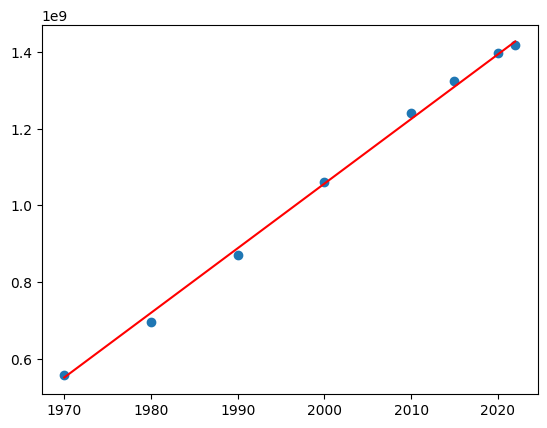

In [259]:
plt.plot(np.array(population_of_India['Year']),
         reg.predict(allYears),color='red')
plt.scatter(np.array(population_of_India['Year']),np.array(population_of_India[92]))

# Prediction for Italy

We use polynomial regression, since the population evolution is clearly not linear

In [281]:
from sklearn.preprocessing import PolynomialFeatures

In [337]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [338]:
#train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
train_Italy, val_Italy = train_test_split(population_of_Italy, test_size=0.2, random_state=42)

In [340]:
y_val=val_Italy[99]
X_val=val_Italy['Year']

y_train = train_Italy[99]
X_train=train_Italy['Year']
X_train 

1970 Population    1970
2022 Population    2022
1990 Population    1990
2010 Population    2010
2000 Population    2000
2020 Population    2020
Name: Year, dtype: int64

In [341]:
y_val=np.array(y_val)
y_train=np.array(y_train)

X_val=np.array(X_val)
X_val=X_val.reshape(-1, 1) 
X_val = poly.fit_transform(X_val.reshape(-1, 1))

X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1)
X_train = poly.fit_transform(X_train.reshape(-1, 1))

In [342]:
print(X_val)
print(X_train)

[[1.980000e+03 3.920400e+06]
 [2.015000e+03 4.060225e+06]]
[[1.970000e+03 3.880900e+06]
 [2.022000e+03 4.088484e+06]
 [1.990000e+03 3.960100e+06]
 [2.010000e+03 4.040100e+06]
 [2.000000e+03 4.000000e+06]
 [2.020000e+03 4.080400e+06]]


In [343]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
reg=pipe.fit(X_train, y_train) 

In [344]:
reg.score(X_train,y_train)

0.9296499786378916

In [349]:
reg.score(X_val,y_val)

0.6410942335227849

In [345]:
y_pred=reg.predict(X_val)
y_pred

array([55103578.34799888, 59123206.32081731])

In [346]:
y_val

array([56329482, 60232906])

In [347]:
allYears=np.array(population_of_Italy['Year'])
allYears=poly.fit_transform(allYears.reshape(-1,1))
#allYearsSq=poly.fit_transform(allYears)
#allYears

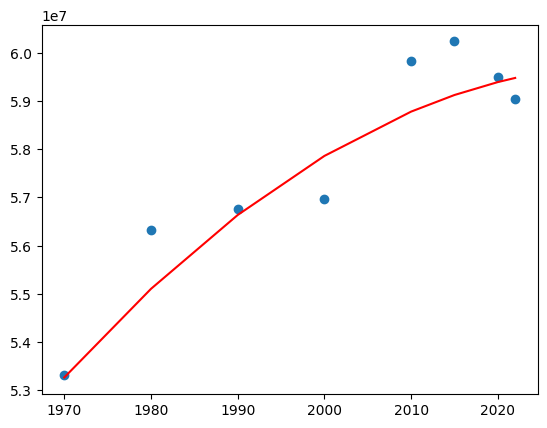

In [348]:
plt.plot(np.array(population_of_Italy['Year']),
         reg.predict(allYears),color='red')
plt.scatter(np.array(population_of_Italy['Year']),np.array(population_of_Italy[99]))

In [316]:
population_of_Italy

,99,Year
1970 Population,53324036,1970
1980 Population,56329482,1980
1990 Population,56756561,1990
2000 Population,56966397,2000
2010 Population,59822450,2010
2015 Population,60232906,2015
2020 Population,59500579,2020
2022 Population,59037474,2022


Overfitting exercise

In [392]:
poly = PolynomialFeatures(degree=4, include_bias=False)

y_val = val_Italy[99]
X_val=val_Italy['Year']

y_train = train_Italy[99]
X_train=train_Italy['Year']

y_val=np.array(y_val)
y_train=np.array(y_train)

X_val=np.array(X_val)
X_val=X_val.reshape(-1, 1) 
X_val = poly.fit_transform(X_val.reshape(-1, 1))

X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1)
X_train = poly.fit_transform(X_train.reshape(-1, 1))

In [393]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
reg=pipe.fit(X_train, y_train) 
reg.score(X_train,y_train)

0.9928904981129079

In [394]:
reg.score(X_val,y_val)

0.8068838551339786

In [395]:
y_pred=reg.predict(X_val)
y_pred

array([57513907.56067604, 60494371.67786354])

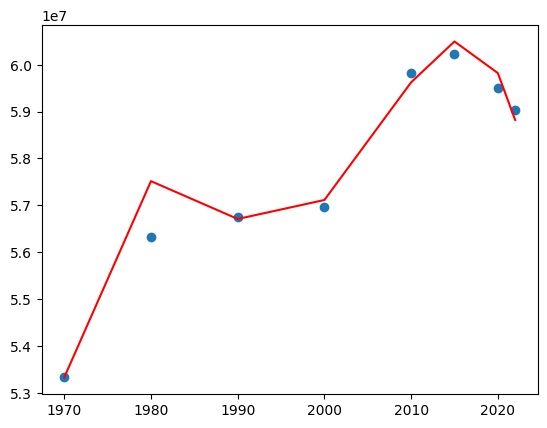

In [396]:
allYears=np.array(population_of_Italy['Year'])
allYears=poly.fit_transform(allYears.reshape(-1,1))

plt.plot(np.array(population_of_Italy['Year']),
         reg.predict(allYears),color='red')
plt.scatter(np.array(population_of_Italy['Year']),np.array(population_of_Italy[99]))

In [328]:
y_pred

array([6.07442439e+007, 8.30783930e+044, 3.88911803e+074, 1.81902231e+104,
       8.50794626e+133, 8.30783930e+044, 1.81902231e+104, 3.97934369e+163,
       8.70532270e+222, 1.90440056e+282, 6.02237867e+007, 1.13888152e+045,
       6.24190793e+074, 3.41816477e+104, 1.87183881e+134, 1.13888152e+045,
       3.41816477e+104, 1.02504729e+164, 3.07393592e+223, 9.21819135e+282])

In [331]:
len(X_val)

20

## Plotting the coefficient of determination for different polynomial models

In [371]:
from sklearn.metrics import mean_squared_error

We try fitting polynomials up to x^5 and check the mean standard error between predicted data and validation data

In [407]:
#train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
train_Italy, val_Italy = train_test_split(population_of_Italy, test_size=0.2, random_state=42)

y_val = val_Italy[99]
X_val=val_Italy['Year']

y_train = train_Italy[99]
X_train=train_Italy['Year']

y_val=np.array(y_val)
y_train=np.array(y_train)

X_val=np.array(X_val)
X_val=X_val.reshape(-1, 1) 

X_train=np.array(X_train)
X_train=X_train.reshape(-1, 1)

In [408]:
mse_array_train=[]
mse_array_val=[]
for i in [1,2,3,4,5]:
    print(i)
    X_train=train_Italy['Year']
    X_val=val_Italy['Year']
    X_val=np.array(X_val)
    X_train=np.array(X_train)
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_val = poly.fit_transform(X_val.reshape(-1, 1))
    X_train = poly.fit_transform(X_train.reshape(-1, 1))
    pipe = make_pipeline(StandardScaler(), LinearRegression())
    reg=pipe.fit(X_train, y_train)
    y_pred_train=reg.predict(X_train)
    y_pred_val=reg.predict(X_val)
    mse_array_train.append(mean_squared_error(y_train,y_pred_train))
    mse_array_val.append(mean_squared_error(y_val,y_pred_val))
    #print(reg.score(X_train,y_train))
    #print(reg.score(X_val,y_val))
    #print(mean_squared_error(y_pred,y_val))

1
2
3
4
5


In [409]:
mse_array_train

[543726445120.0418,
 351848011081.25366,
 288335776168.46906,
 35557403541.8718,
 8.625849483915738]

The minimum MSE between predicted data and validation data is obtained by fitting with a quartic polynomial

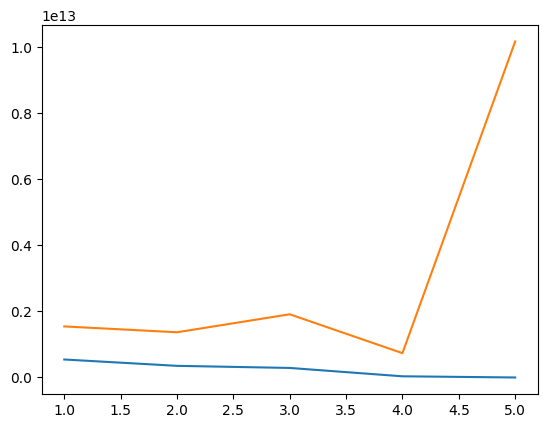

In [410]:
plt.plot([1,2,3,4,5],mse_array_train)
plt.plot([1,2,3,4,5],mse_array_val)